In [10]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Boston.csv")

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# What is the size of the dataset (number of rows and columns)?

In [ ]:
df.shape

(506, 14)

# What are the names of the columns in the dataset?

In [ ]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

# what are column name and their meaning

**CRIM** ===> This column represents the per capita crime rate by town.

**ZN** ====> It represents the proportion of residential land zoned for large lots (over 25,000 sq. ft.).

**INDUS** ===> This column represents the proportion of non-retail business acres per town.

**CHAS** ===>  It's a binary variable (0 or 1) indicating whether the property is adjacent to the Charles River (1 for properties along the river, 0 otherwise).

**NX** ====>  This might be a typo or a misinterpretation of the column name. If it's supposed to represent the nitrous oxide concentration (typically represented as "NOX"), it would signify the concentration of nitrous oxide (an air pollutant) in parts per 10 million.

**RM** ====> This column represents the average number of rooms per dwelling.

**AGE** ===> It represents the proportion of owner-occupied units built before 1940.

**DIS** ===>  This is the weighted distance to employment centers in the Boston area.

**RAD** ====>  It represents the accessibility to radial highways, which is measured as a index.

**TAX** ====>  This column represents the property tax rate.

**PTRATIO** ===> It represents the pupil-teacher ratio by town.

**B** ====> This is a measure of the proportion of residents of African American descent by town.

**LSTAT**  ====> It represents the percentage of lower status population.

**MEDV** =====>  This is the target variable and represents the median value of owner-occupied homes in thousands of dollars.

# How many missing values are there in each column?

In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NX         0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# What is the mean value of the "MEDV" column (median home value)?

In [ ]:
df["MEDV"].mean()

22.532806324110677

# What is the maximum value of the "RM" column (average number of rooms per dwelling)?

In [ ]:
df["RM"].max()

8.78

# What is the minimum value of the "AGE" column (proportion of owner-occupied units built before 1940)?

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df["AGE"].min()

2.9

# How many unique values are there in the "CHAS" column (Charles River dummy variable)?

In [ ]:
df["CHAS"].unique()

array([0, 1])

# Calculate the correlation between "RM" and "MEDV."

In [ ]:
df["RM"].corr(df["MEDV"])

0.6953599470715393

positive **correlation**

# Create a histogram of the "CRIM" column (crime rate).

In [ ]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

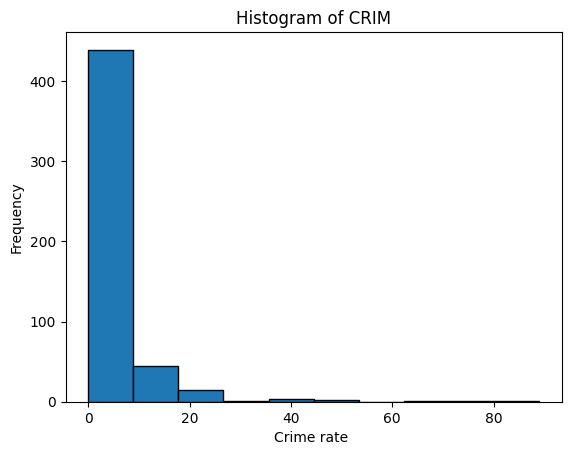

In [ ]:
df["CRIM"].plot(kind = "hist", edgecolor = "black")
plt.xlabel("Crime rate ")
plt.title("Histogram of CRIM")
plt.show()

# Calculate the average "MEDV" for houses with "CHAS" equal to 1 (Charles River proximity).

In [ ]:
df["CHAS"].unique()

array([0, 1])

In [ ]:
result = df[df["CHAS"]==1]["MEDV"].mean()
result

28.439999999999998

# Find the standard deviation of the "TAX" column (property tax rate).

In [ ]:
df["TAX"].std()

168.53711605495903

# Plot a scatter plot between "RM" and "LSTAT" (percentage of lower status population).

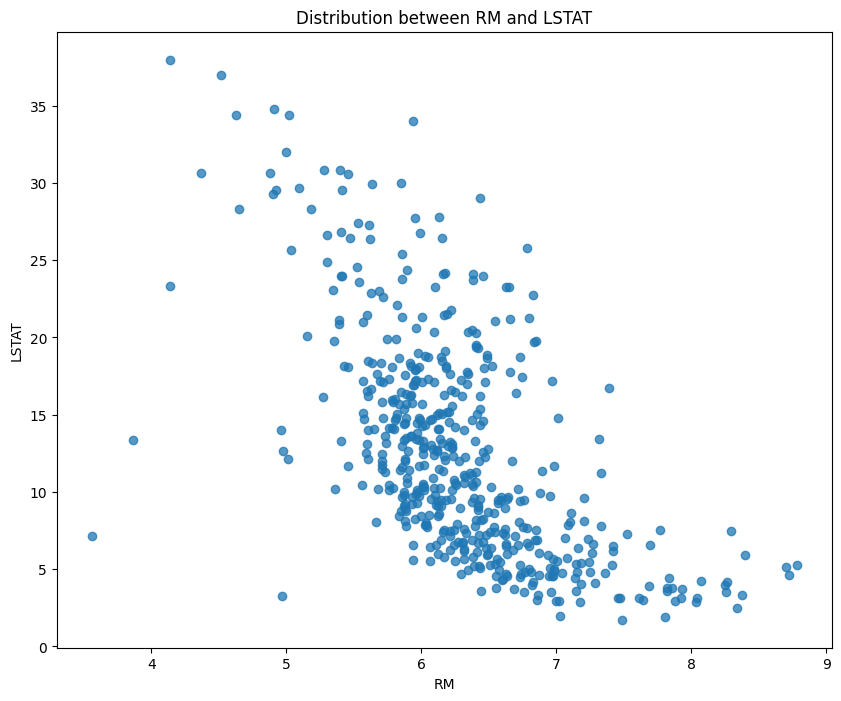

In [ ]:
plt.figure(figsize = (10,8))
fig = plt.scatter(data = df , x = "RM" , y = "LSTAT", alpha = 0.75)
plt.xlabel("RM")
plt.ylabel("LSTAT")
plt.title("Distribution between RM and LSTAT")
plt.show()

**or**

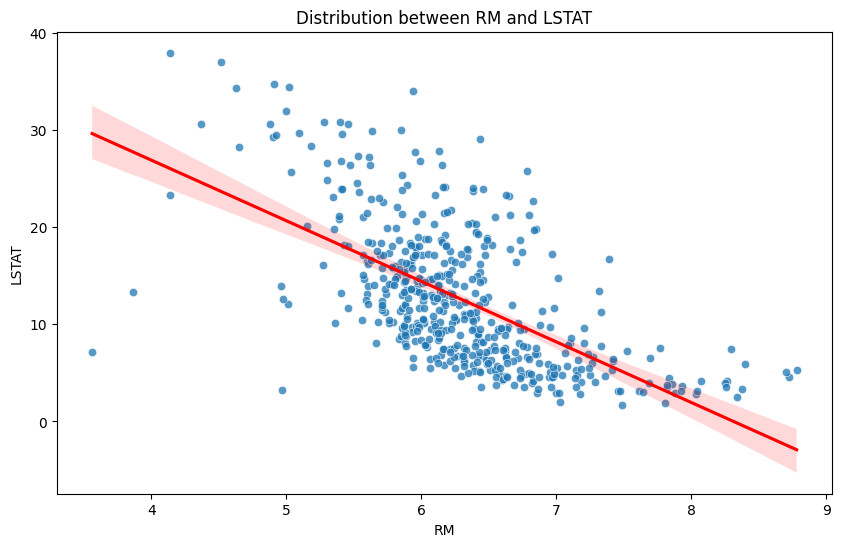

In [ ]:
plt.figure( figsize = (10,6))
sns.scatterplot(x = "RM" , y = "LSTAT" , data = df , alpha = 0.75)
sns.regplot( x = "RM" , y = "LSTAT" , data = df , scatter = False , color = "red")
plt.xlabel("RM")
plt.ylabel("LSTAT")
plt.title("Distribution between RM and LSTAT")
plt.show()

# Create a box plot of the "AGE" column grouped by the "RAD" column (access to radial highways).

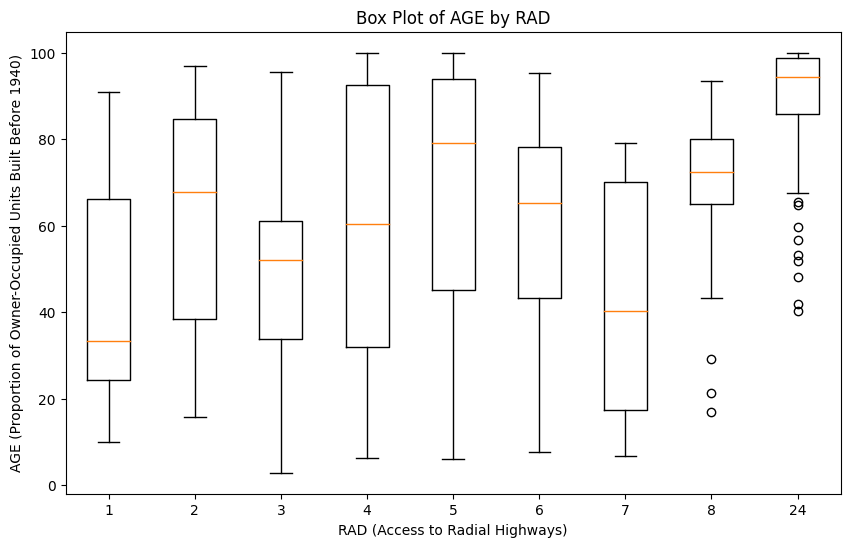

In [ ]:
plt.figure(figsize = (10,6))
plt.boxplot([df[df["RAD"] == rad]["AGE"] for rad in sorted(df["RAD"].unique())] , labels = sorted(df["RAD"].unique()))

plt.title('Box Plot of AGE by RAD')
plt.xlabel('RAD (Access to Radial Highways)')
plt.ylabel('AGE')
plt.show()

# Calculate the 25th percentile of the "PTRATIO" column (pupil-teacher ratio).

In [ ]:
df["PTRATIO"].describe()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64

**or**

In [ ]:
percentile = df["PTRATIO"].quantile(0.25)
percentile

17.4

# Calculate the median "MEDV" for houses with "NOX" greater than 0.7 (nitrogen oxide concentration).

In [ ]:
df["NX"].unique()

array([0.538 , 0.469 , 0.458 , 0.524 , 0.499 , 0.428 , 0.448 , 0.439 ,
       0.41  , 0.403 , 0.411 , 0.453 , 0.4161, 0.398 , 0.409 , 0.413 ,
       0.437 , 0.426 , 0.449 , 0.489 , 0.464 , 0.445 , 0.52  , 0.547 ,
       0.581 , 0.624 , 0.871 , 0.605 , 0.51  , 0.488 , 0.401 , 0.422 ,
       0.404 , 0.415 , 0.55  , 0.507 , 0.504 , 0.431 , 0.392 , 0.394 ,
       0.647 , 0.575 , 0.447 , 0.4429, 0.4   , 0.389 , 0.385 , 0.405 ,
       0.433 , 0.472 , 0.544 , 0.493 , 0.46  , 0.4379, 0.515 , 0.442 ,
       0.518 , 0.484 , 0.429 , 0.435 , 0.77  , 0.718 , 0.631 , 0.668 ,
       0.671 , 0.7   , 0.693 , 0.659 , 0.597 , 0.679 , 0.614 , 0.584 ,
       0.713 , 0.74  , 0.655 , 0.58  , 0.532 , 0.583 , 0.609 , 0.585 ,
       0.573 ])

In [ ]:
a = df[df["NX"] > 0.7]
result = a["MEDV"].median()
result

15.4

# Perform linear regression with "RM" as the independent variable and "MEDV" as the dependent variable. What is the regression equation?

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x = df["RM"].values.reshape(-1,1)
y = df["MEDV"]



In [ ]:
lr = LinearRegression()
lr.fit(x, y)

LinearRegression()

In [ ]:
B0 = lr.intercept_
B1 = lr.coef_

In [ ]:
print("The regression equation is: MEDV = ", B0 , " + " , B1  ," * RM " )

The regression equation is: MEDV =  -34.67062077643857  +  [9.10210898]  * RM 


# Perform a multiple linear regression with "RM," "AGE," and "TAX" as independent variables

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score

In [ ]:
x = df[["RM" , "AGE" , "TAX"]]
y = df["MEDV"]

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.2 , random_state = 42)

In [ ]:
lr = LinearRegression()
lr.fit(x_train , y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test , y_pred)
r2 = r2_score(y_test , y_pred)

In [ ]:
print("MSE : ", mse)
print("R2 : ",r2)

MSE :  37.851500160928865
R2 :  0.48384634571248586


# Create a heatmap to visualize the correlation matrix of all numeric columns.

In [ ]:
correlation = df.corr()

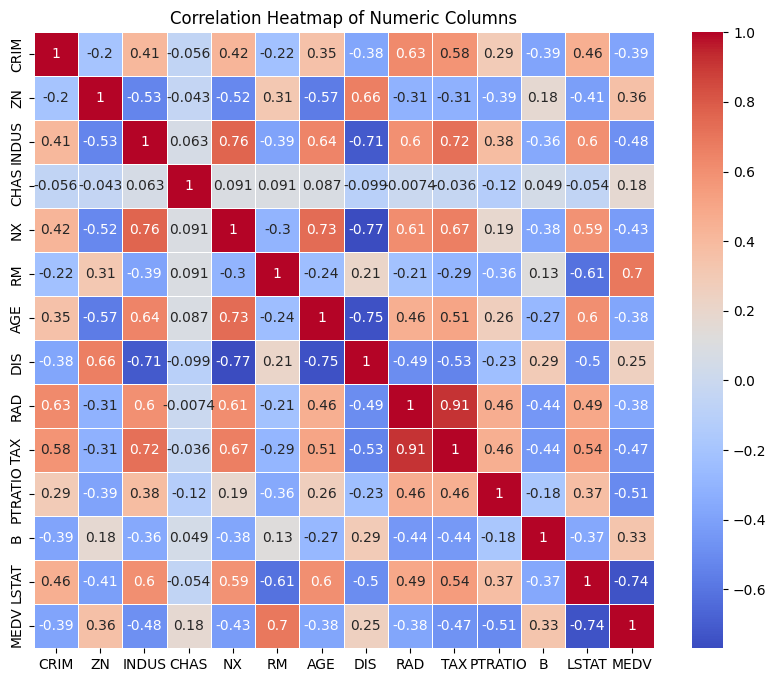

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(correlation , cmap = "coolwarm" , linewidth = 0.6 , annot = True)
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

# Identify and remove outliers in the "CRIM" column using the IQR method.

<Axes: >

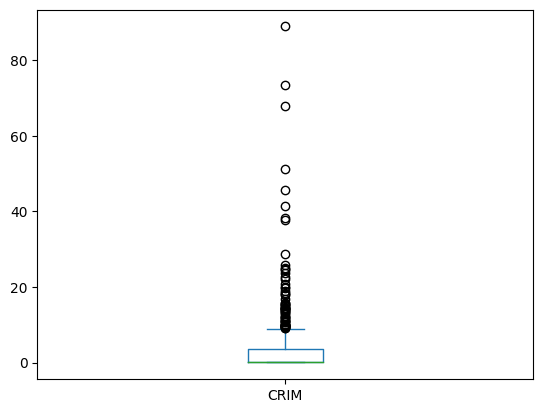

In [ ]:
df["CRIM"].plot(kind = "box")

In [ ]:
a = df["CRIM"]

Q1 = a.quantile(0.25)
Q3 = a.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier = (a < lower_bound ) | ( a > upper_bound)

In [ ]:
df_cleaned = df[~ outlier]

<Axes: >

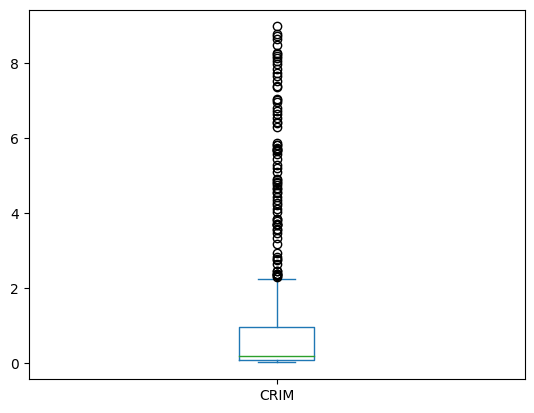

In [ ]:
df_cleaned["CRIM"].plot(kind = "box")

# Create a scatter plot matrix for the columns "RM," "LSTAT," and "MEDV."

In [5]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

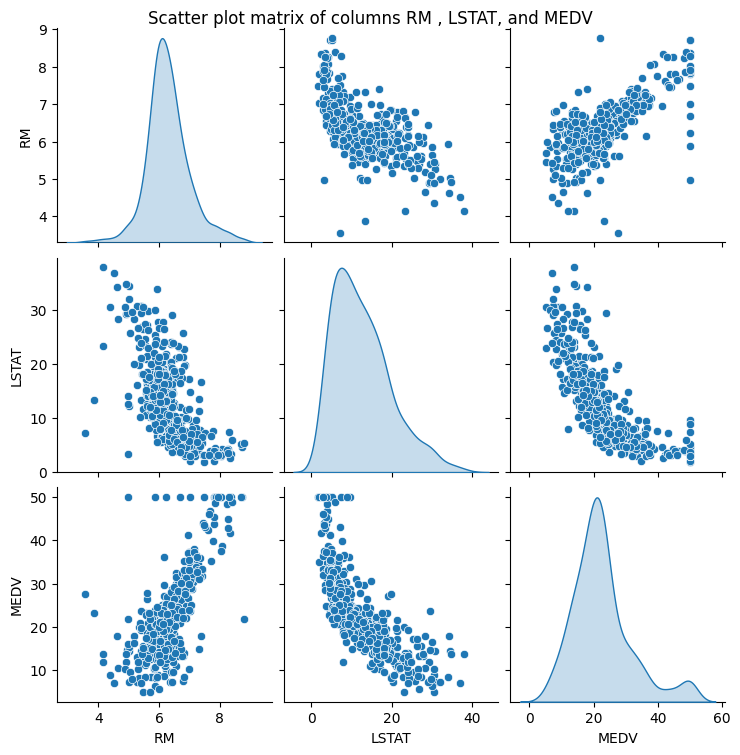

In [9]:
cols = ["RM" , "LSTAT" , "MEDV"]

scatter_matrix = sns.pairplot(df[cols] , diag_kind = "kde")

scatter_matrix.fig.suptitle("Scatter plot matrix of columns RM , LSTAT, and MEDV" , y = 1)

plt.show()

# Perform polynomial regression with "RM" as the independent variable and "MEDV" as the dependent variable (try different polynomial degrees). Which degree provides the best fit?

In [12]:
x = df[["RM"]]
y = df["MEDV"]

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [13]:
mse_values = []

for degree in range(1,11):
  poly = PolynomialFeatures(degree = degree)
  x_train_poly = poly.fit_transform(x_train)
  x_test_poly = poly.fit_transform(x_test)

  lr = LinearRegression()
  lr.fit(x_train_poly , y_train)

  y_pred = lr.predict(x_test_poly)

  mse = mean_squared_error(y_test , y_pred)
  mse_values.append(mse)

  print(f"Degree {degree} : MSE = {mse:.2f}")

Degree 1 : MSE = 46.14
Degree 2 : MSE = 35.37
Degree 3 : MSE = 34.45
Degree 4 : MSE = 39.58
Degree 5 : MSE = 32.51
Degree 6 : MSE = 35.63
Degree 7 : MSE = 38.90
Degree 8 : MSE = 34.70
Degree 9 : MSE = 235.77
Degree 10 : MSE = 152.32


***The degree that corresponds to the lowest MSE on the testing set is the one that provides the best fit for your data***

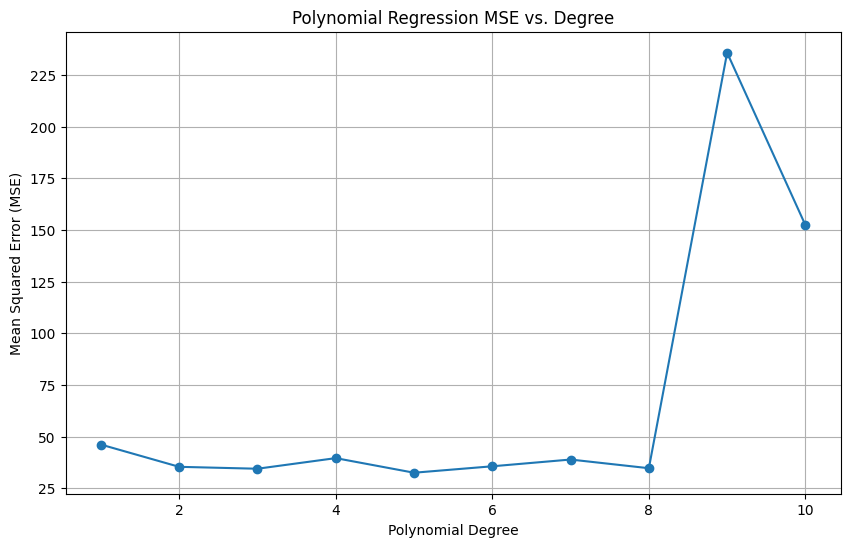

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11), mse_values , marker = "o" , linestyle = "-")
plt.title("Polynomial Regression MSE vs. Degree")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.show()

# Cluster the data into three groups based on the "AGE" and "TAX" columns using k-means clustering

In [16]:
from sklearn.cluster import KMeans

In [18]:
x = df[["AGE" , "TAX"]]

kmean = KMeans(n_clusters = 3 , random_state = 1)

kmean.fit(x)

df["Cluster"] = kmean.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


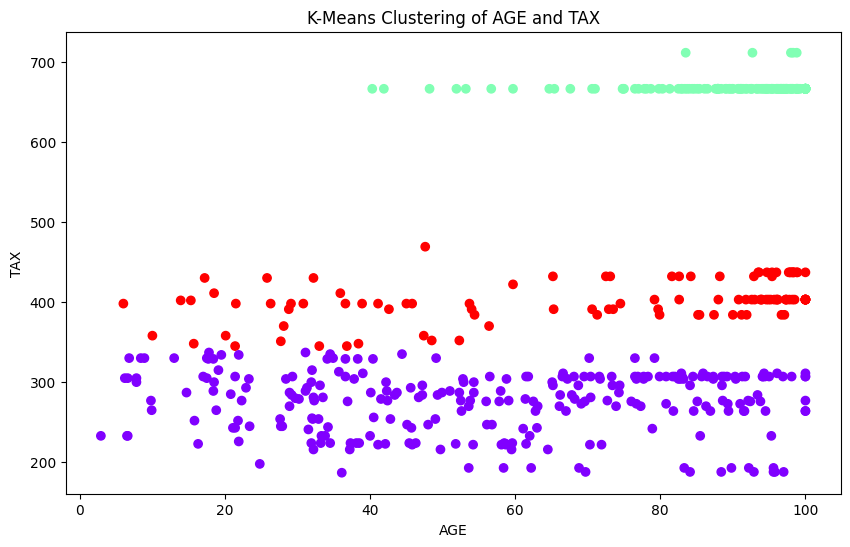

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(df["AGE"] , df["TAX"] , c= df["Cluster"] , cmap = "rainbow")
plt.xlabel("AGE")
plt.ylabel("TAX")
plt.title("K-Means Clustering of AGE and TAX")
plt.show()

# Fit a logistic regression model to predict whether a house is near the Charles River ("CHAS" column) based on other features.

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [25]:
X = df.drop("CHAS", axis=1)                  # Features (exclude the "CHAS" column)
y = df["CHAS"]                               # Target variable ("CHAS" column)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but often recommended for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and fit the logistic regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)

Accuracy: 0.9411764705882353
Confusion Matrix:
[[96  0]
 [ 6  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        96
           1       0.00      0.00      0.00         6

    accuracy                           0.94       102
   macro avg       0.47      0.50      0.48       102
weighted avg       0.89      0.94      0.91       102



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
